# Домашнее задание 2

Осипов Александр, БПМ213. Машинное обучение в прикладных задачах.

# Линейная регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_squared_log_error, mean_absolute_error, r2_score, root_mean_squared_error

#### Загружаем датасет

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

#### Используем LDA для понижения размерности данных

In [3]:
lda = LinearDiscriminantAnalysis(n_components=1)
X = lda.fit(X, y).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# MSE: 
# $S = \frac{1}{n} \sum_{i=1}^{n}(y_i - (ax_i + b))^2$, $y_i$ - реальное, $ax_i + b$ - предсказание
# $\frac{\partial{S}}{\partial{a}} = \frac{-2}{n}\sum_{i=1}^{n}x_i(y_i −(ax_i +b))$ 
# $\frac{\partial S}{\partial b} = \frac{-2}{n}\sum_{i=1}^{n}(y_i −(ax_i +b))$

In [4]:
def gradMSE(X, y, a0, b0, eps, p):
    a = a0
    b = b0
    Xr = X.reshape(-1)
    for _ in range(p):
        
        a = a - eps * (-2) * np.mean(Xr * (y - (a * Xr + b)))
        b = b - eps * (-2) * np.mean((y - (a * Xr + b)))

    return a, b

# MAE:
# $S = \frac{1}{n} \sum_{i=1}^{n}|(y_i - (ax_i + b)|$, $y_i$ - реальное, $ax_i + b$ - предсказание
# $\frac{\partial S}{\partial a} = \frac{-1}{n}\sum_{i=1}^{n}x_i\frac{y_i −(ax_i +b)}{|y_i −(ax_i +b)|}$
# $\frac{\partial S}{\partial b} = \frac{-1}{n}\sum_{i=1}^{n}\frac{y_i −(ax_i +b)}{|y_i −(ax_i +b)|}$

In [5]:
def gradMAE(X, y, a0, b0, eps, p):
    a = a0
    b = b0
    Xr = X.reshape(-1)
    for _ in range(p):

        a = a + eps * np.mean(Xr * (y - (a * Xr + b)) / np.abs(y - (a * Xr + b)))
        b = b + eps * np.mean((y - (a * Xr + b)) / np.abs(y - (a * Xr + b)))

    return a, b

##### С помощью градиентного спуска находим коэффициенты a и b линейной регрессии
##### Таким образом, наше предсказание: aX+b

In [6]:
def LinRegMSE(X_train, y_train, X_test, a0=0, b0=0, eps=0.1, p=20):
    a_mse, b_mse = gradMSE(X_train, y_train, a0, b0, eps, p)
    return (a_mse * X_test + b_mse).reshape(-1)

In [7]:
def LinRegMAE(X_train, y_train, X_test, a0=0, b0=0, eps=0.1, p=20):
    a_mae, b_mae = gradMAE(X_train, y_train, a0, b0, eps, p)
    return (a_mae * X_test + b_mae).reshape(-1) 

##### Используем линейную регрессию из sklearn

In [8]:
LR = LinearRegression().fit(X_train, y_train)
y_sk = LR.predict(X_test)
y_mse = LinRegMSE(X_train, y_train, X_test)
y_mae = LinRegMAE(X_train, y_train, X_test)

##### Сравниваем метрики

In [9]:
def metrics_lin(res, test):
    print('MSE:', mean_squared_error(res, test))
    print('MSLE:', mean_squared_log_error(res, test))
    print('MAE:', mean_absolute_error(res, test))
    print('R2:', r2_score(res, test))
    print('RMSE:', root_mean_squared_error(res, test))
    print()
    print()

In [10]:
print('---------MSE---------')
metrics_lin(y_mse, y_test)
print('---------MAE---------')
metrics_lin(y_mae, y_test)
print('-------sklearn-------')
metrics_lin(y_sk, y_test)

---------MSE---------
MSE: 2906.655854596005
MSLE: 0.1731847499988495
MAE: 42.31350285683858
R2: 0.06070654516168805
RMSE: 53.913410711955564


---------MAE---------
MSE: 28057.682340572483
MSLE: 14.638633297370069
MAE: 149.00846623945006
R2: -16148075.860472076
RMSE: 167.50427558893082


-------sklearn-------
MSE: 2915.7350385292534
MSLE: 0.1741852788965615
MAE: 42.36796961675869
R2: 0.059011005087225454
RMSE: 53.99754659731545




##### Метрики для нашей MSE и sklearn достаточно близки (если взять больше итераций, будут практически совпадать),
##### т.к. sklearn тоже использует MSE для линейной регрессии

##### Построим графики регрессий

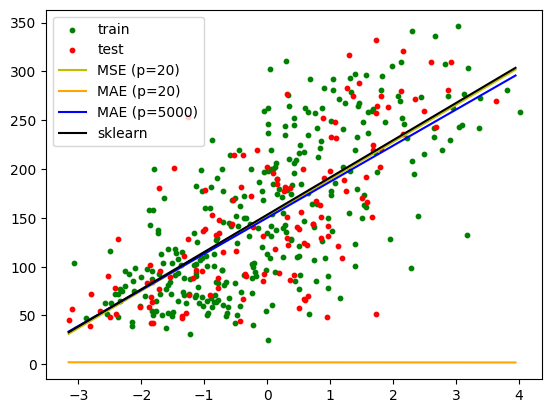

In [11]:
plt.scatter(X_train, y_train, s=10, c='g', label='train')
plt.scatter(X_test, y_test, s=10, c='r', label='test')
xx = np.arange(min(X)[0], max(X)[0], 0.1)

a_mse, b_mse = gradMSE(X_train, y_train, 0, 0, 0.1, 20)
plt.plot(xx, a_mse * xx + b_mse, c='y', label='MSE (p=20)')

a_mae_s, b_mae_s = gradMAE(X_train, y_train, 0, 0, 0.1, 20)
plt.plot(xx, a_mae_s * xx + b_mae_s, c='orange', label='MAE (p=20)')

a_mae, b_mae = gradMAE(X_train, y_train, 0, 0, 0.1, 5000)
plt.plot(xx, a_mae * xx + b_mae, c='b', label='MAE (p=5000)')

a_sk, b_sk = LR.coef_, LR.intercept_
plt.plot(xx, a_sk * xx + b_sk, c='k', label='sklearn')

plt.legend()

##### По графику можно сделать такие выводы:
##### 1) MAE сходится очень медленно, т.к. в производных коэффициенты только +-1
##### 2) MSE и линейная регрессия sklearn практически совпадают
##### 3) при большом количестве итераций MAE дает схожие предсказания
##### 4) В целом, все три модели достаточно хорошо передают тенденцию, однако в общем случае выбросы могли значительно повляить на коэффициенты и предсказания

# Кластеризация: о вкусах не спорят

##### Датасет songs_s:
##### artist - исполнитель (4 разных)
##### song - название песни (по 40 каждого исполнителя)
##### text - до 20 самых частовречающихся слов в песне, исключая частнотные слова английского языка (предлоги, местоимения, частицы)

In [12]:
songs = pd.read_csv('songs_s.csv')

In [13]:
print(songs.shape)
songs.head()

(160, 3)


,artist,song,text
0,The Prodigy,Firestarter,hey starter fire twisted yeah trouble punkin i...
1,The Prodigy,Breathe,come play game breathe exhale pressure ill tes...
2,The Prodigy,Smack My Bitch Up,bitch smack like change pitch might also likel...
3,The Prodigy,Diesel Power,blows mind drastically fantastically like powe...
4,The Prodigy,Out of Space,another ill take brain dimension space gon sen...


##### Будем использовать TF-IDF векторизацию - чем "важнее" слово, тем больше результат
##### Гипотеза: у одного исполнителя некоторые слова будут использоваться чаще, чем у других исполнителей

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(songs.text)

##### Используем LabelEncoding, для конвертации исполнителя в числа (в целом, это необязательно, но так будет проще проверить результативность)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(songs.artist)
artists = list(label_encoder.inverse_transform([0, 1, 2, 3]))
artists

['Cannibal Corpse', 'Lil Uzi Vert', 'Taylor Swift', 'The Prodigy']

##### Разбиваем на train и test выборки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Используем k-means для кластеризации. Число кластеров = число различных исполнителей = 4

In [17]:
from sklearn.cluster import KMeans

num_clusters = len(np.unique(songs.artist))
kmeans = KMeans(n_clusters=num_clusters, max_iter=300, tol=0.1, random_state=42)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=4, random_state=42, tol=0.1)

##### Посмотрим слова, соответсвующие самым значимым компонентам кластеров

In [18]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print('Кластер ' + str(i) + ':', end=' ')
    for ind in order_centroids[i, :20]:
        print(' %s ' %terms[ind], end='')
    print()

Кластер 0:  also  might  come  like  need  theres  yeah  time  ill  hear  no  thats  go  dont  now  fuck  bitch  wont  night  cant 
Кластер 1:  yeah  like  got  dont  what  so  no  just  bitch  get  know  aint  thats  do  go  money  right  cause  off  uzi 
Кластер 2:  blood  through  dead  body  death  skin  flesh  life  human  die  eyes  have  way  alone  now  no  never  only  feel  end 
Кластер 3:  time  out  when  see  never  like  can  oh  just  well  love  know  if  remember  so  think  now  down  have  too 


##### Можно заметить паттерны:
##### Один из кластеров содержит слова blood, death, body, skin - это кластер группы Cannibal Corpse - дез-метал с тематикой крови и убийств
##### Другой содержит слова money и uzi - стереотипно реперские слова, а yeah одно из самых популярных слов - это Lil Uzi Vert
##### У Taylor Swift нет мата и слова в целом разнообразнее
##### У электронщиков The Prodigy слова разнообразные, но короткие и часто повторяющиеся

##### TF-IDF достаточно хорошо разбил слова на кластеры, хотя в них и достаточно много повторений

In [19]:
y_pred_k = kmeans.predict(X_test)

##### Для сравнения используем MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_c = mnb.predict(X_test)

##### Посмотри метрики

In [21]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y_train, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train, kmeans.labels_, sample_size=1000))

Homogeneity: 0.639
Completeness: 0.667
V-measure: 0.653
Adjusted Rand-Index: 0.571
Silhouette Coefficient: 0.070


##### Посмотрим accuracy у kmeans и MultinomialNB

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_k))
print(accuracy_score(y_test, y_pred_c))

0.3125
0.75


##### Для других random_state KMeans показывает accuracy от 0 до 0.8 - так происходит потому, что на самом деле в каждом кластере содержатся
##### песни разных исполнителей, т.к. тексты разбиваются по паттернам и частотности - можно сказать, что в общем случае попадание в тот или иной
##### кластер ничего не скажет нам об исполнителе

##### Multinomial NB дает неплохой результат, т.к. при обучении учитывает не только тексты, но и исполнителей

In [23]:
def prediction(text, kmeans, mnb, artists):
    text_tfidf = vectorizer.transform([text])
    print('---' + text + '---')
    print('K-Means:', *label_encoder.inverse_transform(kmeans.predict(text_tfidf)))
    print('MultinomialNB:', end=' ')
    probs = mnb.predict_proba(text_tfidf)[0]
    print(label_encoder.inverse_transform(mnb.predict(text_tfidf))[0], '   |    ', end='')
    for i in range(len(artists)):
        print(artists[i], ' - ', round(probs[i] * 100, 2),'%', sep='', end='; ')
    print()
    print()

In [24]:
prediction('yeah money', kmeans, mnb, artists)
prediction('blood death', kmeans, mnb, artists)
prediction('oh love', kmeans, mnb, artists)
prediction('the', kmeans, mnb, artists) #это удаленное слово, его быть не могло: посмотрим исходное разделение 

---yeah money---
K-Means: Lil Uzi Vert
MultinomialNB: Lil Uzi Vert    |    Cannibal Corpse - 9.47%; Lil Uzi Vert - 62.27%; Taylor Swift - 13.98%; The Prodigy - 14.27%; 

---blood death---
K-Means: Taylor Swift
MultinomialNB: Cannibal Corpse    |    Cannibal Corpse - 80.21%; Lil Uzi Vert - 5.99%; Taylor Swift - 6.51%; The Prodigy - 7.3%; 

---oh love---
K-Means: The Prodigy
MultinomialNB: Taylor Swift    |    Cannibal Corpse - 10.35%; Lil Uzi Vert - 17.62%; Taylor Swift - 59.42%; The Prodigy - 12.6%; 

---the---
K-Means: The Prodigy
MultinomialNB: Taylor Swift    |    Cannibal Corpse - 24.22%; Lil Uzi Vert - 25.78%; Taylor Swift - 26.56%; The Prodigy - 23.44%; 



##### Посмотрим теперь другой датасет: исполнителей 10, у каждого по 20 песен, текст - вся песня целиком

In [25]:
songs = pd.read_csv('songs.csv')
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(songs.text)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(songs.artist)
artists_ = list(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
num_clusters = len(np.unique(songs.artist))
kmeans_ = KMeans(n_clusters=num_clusters, max_iter=300, tol=0.1, random_state=40)
kmeans_.fit(X_train, y_train)
order_centroids = kmeans_.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print('Кластер ' + str(i) + ':', end=' ')
    for ind in order_centroids[i, :20]:
        print(' %s ' %terms[ind], end='')
    print()

Кластер 0:  just  know  what  how  too  dont  have  make  if  who  start  feel  wanna  made  bad  when  let  did  well  like 
Кластер 1:  take  got  youll  come  ill  never  off  go  another  look  if  feel  get  when  love  time  out  where  can  like 
Кластер 2:  wanna  dont  love  life  go  no  ooh  like  yeah  really  want  do  so  night  need  say  feel  stop  know  also 
Кластер 3:  also  might  come  where  man  life  have  more  had  down  gotta  head  youll  got  good  gonna  hey  ill  how  if 
Кластер 4:  dead  life  through  now  have  out  more  back  down  world  also  might  like  feel  been  never  see  head  shit  no 
Кластер 5:  ayy  like  do  cant  time  bitch  out  keep  dont  so  know  get  hey  beat  got  if  remember  fuck  what  gotta 
Кластер 6:  world  if  call  never  off  make  might  then  love  gonna  know  life  need  money  think  can  time  how  another  also 
Кластер 7:  down  been  so  well  now  no  like  never  niggas  remember  when  know  cause  ou

##### Теперь кластеры еще больше похожи друг на друга, тяжело разделить их; например, значительно менее выраженным стал довольно яркий кластер Cannibal Corpse

In [26]:
y_pred_k = kmeans_.predict(X_test)
mnb_ = MultinomialNB()
mnb_.fit(X_train, y_train)
y_pred_c = mnb_.predict(X_test)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, kmeans_.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, kmeans_.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, kmeans_.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y_train, kmeans_.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train, kmeans_.labels_, sample_size=1000))

Homogeneity: 0.316
Completeness: 0.329
V-measure: 0.322
Adjusted Rand-Index: 0.143
Silhouette Coefficient: 0.049


##### Метрики тоже изменились

In [27]:
print(accuracy_score(y_test, y_pred_k))
print(accuracy_score(y_test, y_pred_c))

0.1
0.25


In [28]:
prediction('yeah money', kmeans_, mnb_, artists_)
prediction('blood death', kmeans_, mnb_, artists_)
prediction('oh love', kmeans_, mnb_, artists_)
prediction('the', kmeans_, mnb_, artists_)

---yeah money---
K-Means: The Prodigy
MultinomialNB: Lil Uzi Vert    |    Cannibal Corpse - 6.87%; Fiona Apple - 5.29%; Johnny Cash - 5.75%; Kanye West - 17.05%; Lil Uzi Vert - 26.13%; Michael Jackson - 7.41%; Napalm Death - 5.59%; Taylor Swift - 9.13%; The Prodigy - 10.33%; XXXTENTACION - 6.44%; 

---blood death---
K-Means: Cannibal Corpse
MultinomialNB: Cannibal Corpse    |    Cannibal Corpse - 11.25%; Fiona Apple - 10.63%; Johnny Cash - 10.0%; Kanye West - 11.25%; Lil Uzi Vert - 9.38%; Michael Jackson - 8.75%; Napalm Death - 8.75%; Taylor Swift - 11.25%; The Prodigy - 10.63%; XXXTENTACION - 8.13%; 

---oh love---
K-Means: Johnny Cash
MultinomialNB: Taylor Swift    |    Cannibal Corpse - 7.94%; Fiona Apple - 13.21%; Johnny Cash - 10.6%; Kanye West - 12.13%; Lil Uzi Vert - 7.88%; Michael Jackson - 11.36%; Napalm Death - 7.17%; Taylor Swift - 13.44%; The Prodigy - 9.47%; XXXTENTACION - 6.79%; 

---the---
K-Means: Cannibal Corpse
MultinomialNB: Cannibal Corpse    |    Cannibal Corpse - 

##### Можно также попробовать сгруппировать исполнителей на меньшее число кластеров - вероятно, рокеры попали бы в один кластер, реперы в другой и т.д.

##### Вывод: кластеризовать музыку по текстам можно, если количество кластеров будет небольшим и исполнители разнообразными.
##### Например, разделять метал с жесткой тематикой (Cannibal Corpse) и стереотипный рэп с характерными словами (Lil Uzi Vert) можно,
##### а разделять поп-музыку про любовь (Taylor Swift, Fiona Apple) - ненадежно

##### Таким образом, кластеризация текстов песен с помощью k-means зависит от входных данных; в общем случае кластеризация по исполнителям не будет давать надежных результатов